Marios Kaplanis, AEM:9630
Pavlos Koulas, AEM:9326

In [38]:
#Import libraries
import numpy as np
import matplotlib.pyplot as plt
import math

#Define Variables
D1 = [2.8, -0.4, -0.8, 2.3, -0.3, 3.6, 4.1]
D2 = [-4.5, -3.4, -3.1, -3.0, -2.3]
thetaArray=np.linspace(-10.0,10.0, num=250)

Part A
Question 1

2.6104417670682736
-3.172690763052209


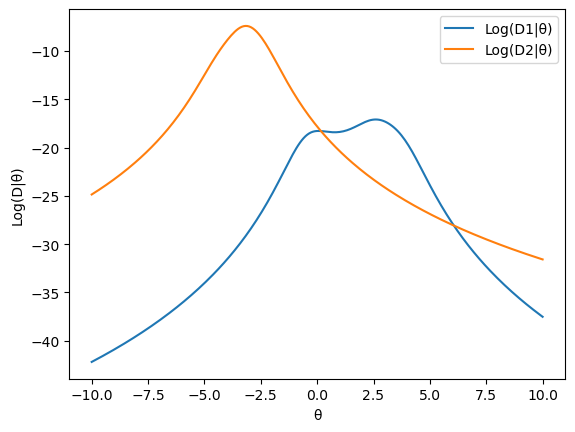

In [44]:
#The following function computes the maximum for our problem's given function and plots the log of probability with theta.
def fit(D,theta):
    pp = 1
    for i in range(len(D)):

        p = (1/(math.pi)) * (1/(1 + (np.array(D[i]) - np.array(theta))**2))
        pp = pp * p

    #pp_prime = np.diff(pp)

    thetamax = np.argmax(pp)
    print(theta[thetamax])

    plt.plot(theta, np.log(pp))
    plt.xlabel('θ')
    plt.ylabel('Log(D|θ)')
    plt.gca().legend(('Log(D1|θ)','Log(D2|θ)'))
    return(theta[thetamax])

#Find the theta's for each class and display the diagram.
theta1 = fit(D1, thetaArray)
theta2 = fit(D2, thetaArray)
plt.plot
plt.show()

As we can see in the above diagram, the values of theta that we computed using Maximum Likelihood Method, indeed correspond to the maximum value of theta that maximizes the function.

Question 2

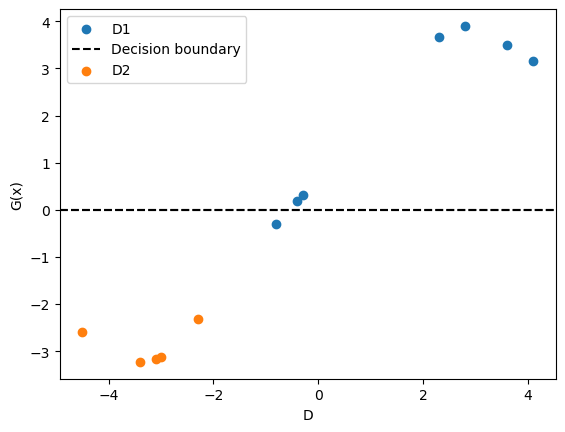

In [49]:
#A priori probabilities for each class
Pw1 = 7/12
Pw2 = 5/12

#The following function computes and plots the prediction to classify the 2 classes.
def predictA(D):
    p1 = p2 = 1
    gg = []
    for i in range(len(D)):

        p1 = (1/(math.pi)) * (1/(1 + (np.array(D[i]) - np.array(theta1))**2))
        p2 = (1/(math.pi)) * (1/(1 + (np.array(D[i]) - np.array(theta2))**2))


        g = np.log(p1) - np.log(p2) + np.log(Pw1) - np.log(Pw2)
        gg.append(g)
    plt.scatter(D, gg)
    plt.xlabel("D")
    plt.ylabel("G(x)")
    plt.gca().legend(('D1','Decision boundary','D2'))
    plt.axhline(y=0, c="black", linestyle ="--")

#Call the prediction function for each class pointers
predictA(D1)
predictA(D2)
plt.show()

Using the discrimination function g, and the decision boundary g(x)=0, we can notice from the diagram that the dots contained in the upper part of the diagram(g(x)>0) correspond to the class ω1, and the dots contained in the bottom part of the diagram(g(x)<0) correspond to the class ω2. To split our data we used the following decision mathematial formula: g(x) = log P(x|ˆθ1) − log P(x|ˆθ2) + log P(ω1) − log P(ω2), where θ1 and θ2 are the maximum values of theta we computed.

Part B, Question 1

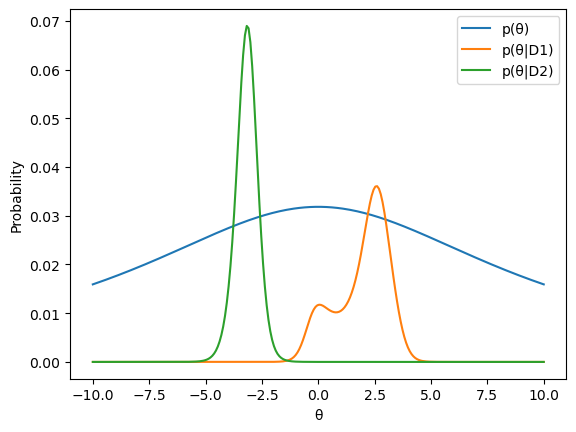

In [52]:
#Mathematical formula for Bayess estimation 
pTheta = (1/(10 * math.pi)) * (1/(1 + (np.array(thetaArray)/10)**2))

#The following function computes and plots the posterior probability funtion using Bayess estimation theory.
def posterD(D,theta):
    pp = 1
    for i in range(len(D)):

        p = (1/(math.pi)) * (1/(1 + (np.array(D[i]) - np.array(theta))**2))

        pTh = (1 / (10 * math.pi)) * (1 / (1 + (np.array(theta) / 10) ** 2))

        pp = pp * p

    return(pp)

posterD1 = posterD(D1, thetaArray)
posterD2 = posterD(D2, thetaArray)


for i in range(len(thetaArray)):
    Total1 = sum(posterD1*pTheta)
    Total2 = sum(posterD2 * pTheta)


pThetaPosteriorD1 = (posterD1 * pTheta) / Total1
pThetaPosteriorD2 = (posterD2 * pTheta) / Total2

plt.plot(thetaArray, pTheta)
plt.plot(thetaArray, pThetaPosteriorD1)
plt.plot(thetaArray, pThetaPosteriorD2)
plt.gca().legend(('p(θ)','p(θ|D1)','p(θ|D2)'))
plt.xlabel('θ')
plt.ylabel('Probability')
plt.show()

As we can see in the diagram above, the posterior probabilities p(θ|D1) και p(θ|D2), have the highest value at the same points as in the Maximum Likelihood method, meaning that the probability is the maximum for the same values of θ, as the ones we computed in question 1, while the prior p(θ) probability follows a more linear pattern and has the max value of the probability around the value of θ=0.

Question 2

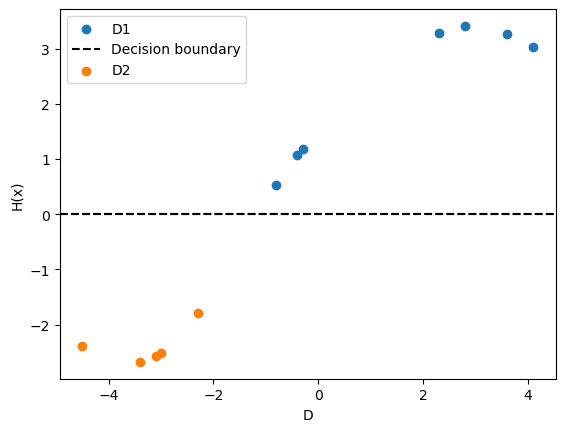

In [54]:
#Following function computes and plots the prediction for each class pointers.
def predictB(D):
    pp = 1
    hh = []
    for i in range(len(D)):

        p = (1/(math.pi)) * (1/(1 + (np.array(D[i]) - np.array(thetaArray))**2))

        pXPoster1 = sum(p * pThetaPosteriorD1)
        pXPoster2 = sum(p * pThetaPosteriorD2)

        Pw1 = 7/12
        Pw2 = 5/12

        h = np.log(pXPoster1) - np.log(pXPoster2) + np.log(Pw1) - np.log(Pw2)
        hh.append(h)

    plt.scatter(D, hh)
    plt.xlabel("D")
    plt.ylabel("H(x)")
    plt.axhline(y=0, c="black", linestyle="--")
    plt.gca().legend(('D1','Decision boundary','D2'))

predictB(D1)
predictB(D2)

plt.show()

Using the discrimination function h, and the decision boundary h(x)=0, we can notice from the diagram that the dots contained in the upper part of the diagram(h(x)>0) correspond to the class ω1, and the dots contained in the bottom part of the diagram(h(x)<0) correspond to the class ω2. To split our data we used the following decision mathematial formula: h(x) = log P(x|D1) − log P(x|D2) + log P(ω1) − log P(ω2), where D1 and D2 are each class's pointers. As we can notice in the plot, the dots are more scattered away from the decision boundary(h(x)=0) for each D, and there are no dots from class D1 in the bottom part of the diagram, in comparison to the diagram from Part A.